This dataset was obtained from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [67]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install DataProfiler[full]

  Obtaining dependency information for DataProfiler[full] from https://files.pythonhosted.org/packages/04/99/3ee2978796b9423dc8385aa112a457c1656db5f4274babf3c3754c09d063/DataProfiler-0.10.7-py3-none-any.whl.metadata
  Obtaining dependency information for chardet>=3.0.4 from https://files.pythonhosted.org/packages/38/6f/f5fbc992a329ee4e0f288c1fe0e2ad9485ed064cac731ed2fe47dcc38cbf/chardet-5.2.0-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 827.0/827.0 kB 14.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for packaging>=23.0 from https://files.pythonhosted.org/packages/ec/1a/610693ac4ee14fcdf2d9bf3c493370e4f2ef7ae2e19217d7a237ff42367d/packaging-23.2-py3-none-any.whl.metadata
  Obtaining dependency information for boto3>=1.28.61 from https://files.pythonhosted.org/packages/e2/27/b5bf0481b9ccc165954b55273ffdb4a4ebaf64d94d663e4b8b5a4a

In [12]:
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')

In [13]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
data.shape

(284807, 31)

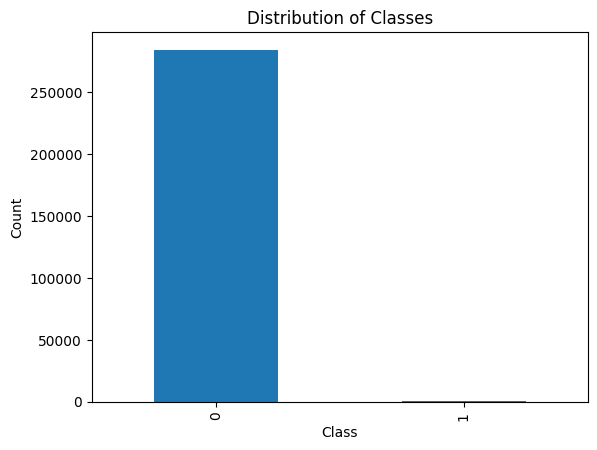

In [21]:
count_class_vals = pd.value_counts(data['Class'], sort = True).sort_index()
count_class_vals.plot(kind = 'bar')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

From the above plot, it can be seen that the distribution of classes are imbalanced. There are significantly more classes with label 0 (not fraud) compared to fraud cases. Methods to handle imbalanced dataset include

- Data upsampling to add more copies of under-represented class
- Data down-sampling to remove copies of over-represented class
- Use better performance metric such as precision, recall or F1 score.

/tmp/ipykernel_42/3940122812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Amount'])


<Axes: xlabel='Amount', ylabel='Density'>

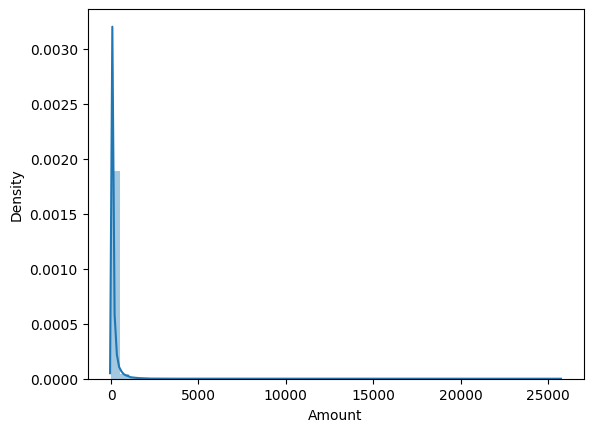

In [27]:
sns.distplot(data['Amount'])

From the plot above, most of the transactions are in the ranges of 0 to 1000 dollars.

In [28]:
data.agg(['min', 'max']) # the minimum and maximum values in each column

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
min,0.0,-56.40751,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.00,0
max,172792.0,2.45493,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.16,1


The time and amount column need to be standardized as the values are in bigger scale.

In [32]:
from sklearn.preprocessing import StandardScaler, RobustScaler

data['Amount_sc'] = RobustScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data['Time_sc'] = RobustScaler().fit_transform(data['Time'].values.reshape(-1,1))

In [36]:
frauds_num = len(data[data.Class == 1])
fraud_idx = data[data.Class == 1].index
not_fraud_idx = data[data.Class == 0].index
sample_not_fraud_idx = np.random.choice(not_fraud_idx, frauds_num, replace = False)

In [38]:
under_sample_idx = np.concatenate([fraud_idx, sample_not_fraud_idx])
under_sample_data = data.iloc[under_sample_idx, :]

print('Total number of transactions :', len(under_sample_data))
print('Percentage of fraud transactions :', len(data[data.Class == 1]) / len(under_sample_data))

Total number of transactions : 984
Percentage of fraud transactions : 0.5


In [40]:
y_vals = under_sample_data['Class']
under_sample_data = under_sample_data.drop(['Class'], axis = 1)

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(under_sample_data, y_vals, test_size = 0.2, random_state = 2023)

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [50]:
logistic_reg_params = {'penalty': ['l1', 'l2'], 'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_logistic_params = GridSearchCV(LogisticRegression(), logistic_reg_params)
grid_logistic_params.fit(X_train, y_train)
log_reg = grid_logistic_params.best_estimator_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [51]:
svc_params = {'C': [0.5, 0.6, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.5, 0.6, 0.7, 0.9, 1],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [52]:
svc = grid_svc.best_estimator_

In [53]:
y_train_preds = log_reg.predict(X_train)

In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       394
           1       0.95      0.88      0.91       393

    accuracy                           0.92       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.92      0.92      0.92       787



In [56]:
y_test_preds = log_reg.predict(X_test)
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.91      0.89      0.90        99

    accuracy                           0.90       197
   macro avg       0.90      0.90      0.90       197
weighted avg       0.90      0.90      0.90       197



<Axes: >

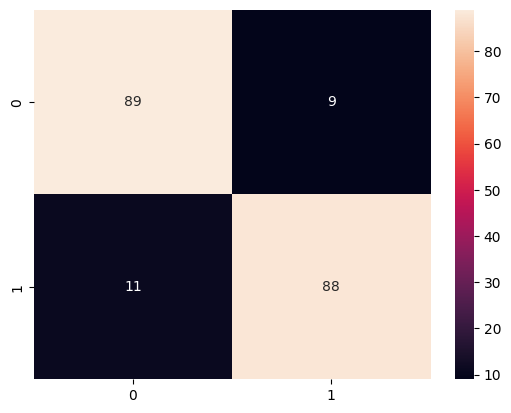

In [58]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_preds)
sns.heatmap(cm, annot = True)

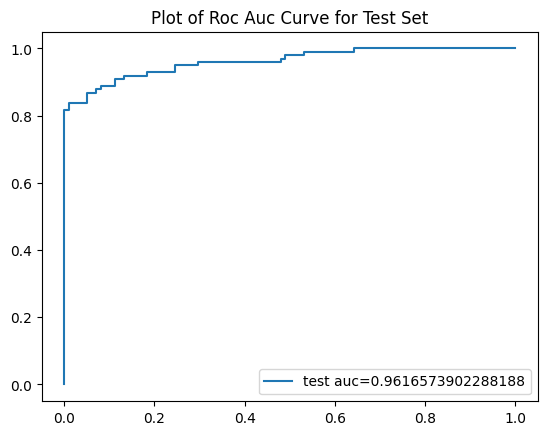

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_pred_proba = log_reg.predict_proba(X_test)[::, 1]
fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba)
auc = roc_auc_score(y_test, y_test_pred_proba)
plt.plot(fpr,tpr,label="test auc="+str(auc))
plt.title('Plot of Roc Auc Curve for Test Set')
plt.legend()
plt.show()

In [63]:
y_train_preds = svc.predict(X_train)
print(classification_report(y_train, y_train_preds))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       394
           1       0.99      0.81      0.89       393

    accuracy                           0.90       787
   macro avg       0.91      0.90      0.90       787
weighted avg       0.91      0.90      0.90       787



In [64]:
y_test_preds = svc.predict(X_test)
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89        98
           1       0.94      0.82      0.88        99

    accuracy                           0.88       197
   macro avg       0.89      0.88      0.88       197
weighted avg       0.89      0.88      0.88       197



<Axes: >

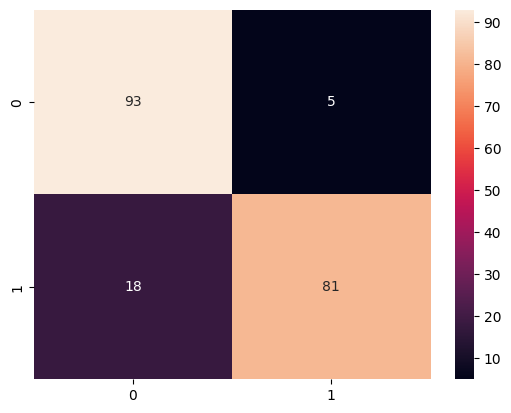

In [65]:
cm = confusion_matrix(y_test, y_test_preds)
sns.heatmap(cm, annot = True)

In [4]:
from dataprofiler import Data, Profiler

In [5]:
data = Data("/kaggle/input/creditcardfraud/creditcard.csv")

In [6]:
profile = Profiler(data)

INFO:DataProfiler.profilers.profile_builder: Finding the Null values in the columns...  (with 3 processes)


/opt/conda/lib/python3.10/site-packages/dataprofiler/profilers/profile_builder.py:2903: UserWarning: The data will be profiled with a sample size of 56961. All statistics will be based on this subsample and not the whole dataset.
  warnings.warn(
100%|██████████| 31/31 [00:06<00:00,  4.51it/s]


INFO:DataProfiler.profilers.profile_builder: Calculating the statistics...  (with 4 processes)


100%|██████████| 31/31 [00:39<00:00,  1.29s/it]


In [10]:
report = profile.report(report_options={"output_format":"pretty"})

In [11]:
import json

print(json.dumps(report, indent=4))

{
    "global_stats": {
        "samples_used": 56961,
        "column_count": 31,
        "row_count": 284807,
        "row_has_null_ratio": 0.0,
        "row_is_null_ratio": 0.0,
        "unique_row_ratio": 0.9962,
        "duplicate_row_count": 1081,
        "file_type": "csv",
        "encoding": "utf-8",
        "correlation_matrix": null,
        "chi2_matrix": "[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan, nan], ... , [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,\n  nan, nan,  1.]]",
        "profile_schema": {
            "Time": [
                0
            ],
            "V1": [
                1
            ],
            "V2": [
                2
            ],
            "V3": [
                3
            ],
            "V4": [
                4
            ],